# "Unexplained variance" with and without systematic factors

## Overview

Is this difference explainable by chance alone? We think that a hypothesis test on<br>
its own answers this question. It doesn't. This sets up a decision tree with<br>
"chance" as an explanatory factor. What are the other branches? Be specific. Name<br>
variables. Explain whether those variables are measured and how.

The thing is, in order to know whether effects are explainable by chance alone,<br>
we need to know how much chance there is. We cannot know this without including all<br>
important systematic effects - trends, confounders, etc.

This example shows how different the "unexplained variance" can look when we do or<br>
don't incorporate all systematic factors. Remember that it is the unexplained variance<br>
in the sample that is used to infer the amount of variance/chance in any test<br>
statistic of interest

In [1]:
from dataclasses import dataclass
from typing import List

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
@dataclass
class Params:
    num_rows: int
    alpha: float
    beta: List[float]
    sigma: float
    x_mean: float
    x_sigma: float

In [4]:
p = Params(num_rows=200, alpha=2, beta=[5], sigma=0.5, x_mean=5, x_sigma=1)

In [5]:
np.random.seed(0)
x = np.random.normal(loc=p.x_mean, scale=p.x_sigma, size=p.num_rows)
underlying_relationship = p.alpha + p.beta * x
y = underlying_relationship + np.random.normal(scale=p.sigma, size=p.num_rows)

C:\Users\vr229e\AppData\Local\Temp\ipykernel_17024\2926375759.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


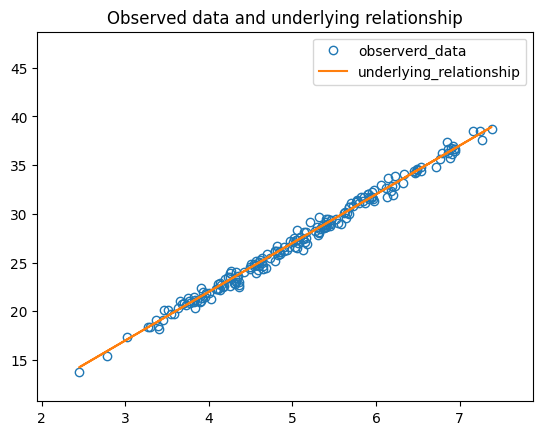

In [6]:
title = "Observed data and underlying relationship"
fig, ax = plt.subplots()
ax.plot(x, y, "o", mfc="none", label="observerd_data")
ax.plot(x, underlying_relationship, label="underlying_relationship")
ax.set_title(title)
ax.set_ylim(y.min() - 3, y.max() + 10)
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.legend()
fig.show()

## Set up data for comparison

Unexplained variance without systematic factor

In [7]:
x_centered = x - x.mean()

Unexplained variance with systematic factor

In [8]:
X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
coeffs = model.coef_

In [9]:
thresh = 0.1
assert abs(coeffs[0] - p.beta[0]) < thresh

In [10]:
train_preds = model.predict(X)
resids = y - train_preds

## Comparison plots

C:\Users\vr229e\AppData\Local\Temp\ipykernel_17024\793016087.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


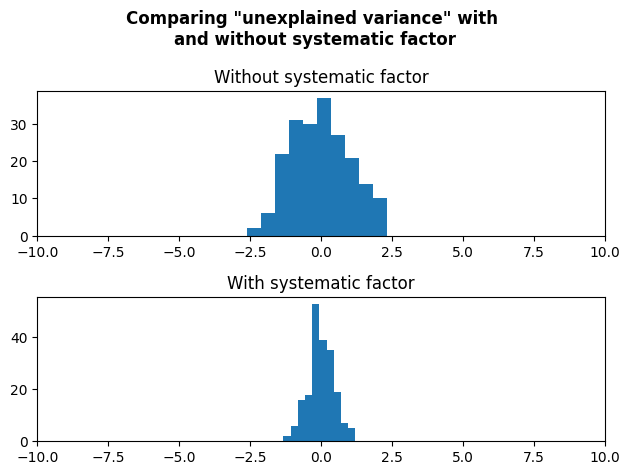

In [11]:
title = 'Comparing "unexplained variance" with \nand without systematic factor'
subtitles = ["Without systematic factor", "With systematic factor"]
fig = plt.figure()
for index, var in enumerate([x_centered, resids]):
    ax = plt.subplot(2, 1, index + 1)
    ax.hist(var)
    ax.set_xlim(-10, 10)
    ax.set_title(subtitles[index])
plt.suptitle(title, fontweight='bold')
fig.tight_layout()
fig.show()